In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/good-20shuffle-3seed.pkl']

In [5]:
top_k = 100000

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

316

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)
best_min_dev.groupby(['file', 'experiment_id']).ngroups

362

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)
true_best.groupby(['file', 'experiment_id']).ngroups

375

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.834093  0.001459  0.831669  0.832795   
mean_validation_auc        100000.0  0.807632  0.001981  0.799828  0.806168   
mean_whole_validation_auc  100000.0  0.807796  0.002271  0.795433  0.806389   
max_overfit_auc            100000.0  0.034547  0.007664  0.021213  0.029016   
min_dev_auc                100000.0  0.809553  0.009627  0.655333  0.808829   
min_validation_auc         100000.0  0.803517  0.010620  0.634350  0.802431   
min_whole_validation_auc   100000.0  0.807165  0.002359  0.792570  0.805820   

                                50%       75%       max  
mean_dev_auc               0.834009  0.835345  0.837321  
mean_validation_auc        0.807658  0.809138  0.812574  
mean_whole_validation_auc  0.807900  0.809423  0.812808  
max_overfit_auc            0.032604  0.037966  0.066976  
min_dev_auc                0.810489  0.811570  0.815868  
min_validation_auc         0.804228  0.806108  0.810290  
min_whole_validation_auc   0.807354  0.808822  0.812444

In [11]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.833244  0.002407  0.825571  0.831572   
mean_validation_auc        100000.0  0.807348  0.002240  0.798770  0.805954   
mean_whole_validation_auc  100000.0  0.807213  0.003610  0.782489  0.805994   
max_overfit_auc            100000.0  0.030111  0.005830  0.017769  0.025451   
min_dev_auc                100000.0  0.810832  0.001306  0.808900  0.809799   
min_validation_auc         100000.0  0.803932  0.003120  0.783920  0.802466   
min_whole_validation_auc   100000.0  0.806504  0.003788  0.777875  0.805322   

                                50%       75%       max  
mean_dev_auc               0.833642  0.835300  0.837321  
mean_validation_auc        0.807475  0.809021  0.812574  
mean_whole_validation_auc  0.807719  0.809314  0.812808  
max_overfit_auc            0.029629  0.033708  0.060700  
min_dev_auc                0.810603  0.811629  0.815868  
min_validation_auc         0.804198  0.806052  0.810290  
min_whole_validation_auc   0.807165  0.808706  0.812444

In [12]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.831734  0.013118  0.500000  0.829875   
mean_validation_auc        100000.0  0.807335  0.011965  0.500000  0.806749   
mean_whole_validation_auc  100000.0  0.808975  0.001300  0.806533  0.807902   
max_overfit_auc            100000.0  0.031515  0.007886  0.000000  0.027269   
min_dev_auc                100000.0  0.807662  0.015880  0.500000  0.806660   
min_validation_auc         100000.0  0.803051  0.015930  0.500000  0.802981   
min_whole_validation_auc   100000.0  0.808399  0.001284  0.806533  0.807343   

                                50%       75%       max  
mean_dev_auc               0.832957  0.835012  0.837321  
mean_validation_auc        0.808050  0.809231  0.812574  
mean_whole_validation_auc  0.808864  0.809897  0.812808  
max_overfit_auc            0.029871  0.033580  0.095429  
min_dev_auc                0.809764  0.811326  0.815868  
min_validation_auc         0.804720  0.806367  0.810290  
min_whole_validation_auc   0.808201  0.809267  0.812655

In [13]:
best = best_mean_dev

In [14]:
best.shape

(100000, 61)

In [15]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_is_unbalance  param_boost_from_average
False               False                       77
                    True                        76
True                False                       90
                    True                        73
dtype: int64

In [16]:
best['param_bagging_enable'] = (best.param_bagging_freq != 0)
best.groupby('param_bagging_enable').size()

param_bagging_enable
False    64625
True     35375
dtype: int64

In [17]:
best['param_feature_fraction_enable'] = (best.param_feature_fraction != 1)
best.groupby('param_feature_fraction_enable').size()

param_feature_fraction_enable
False    39492
True     60508
dtype: int64

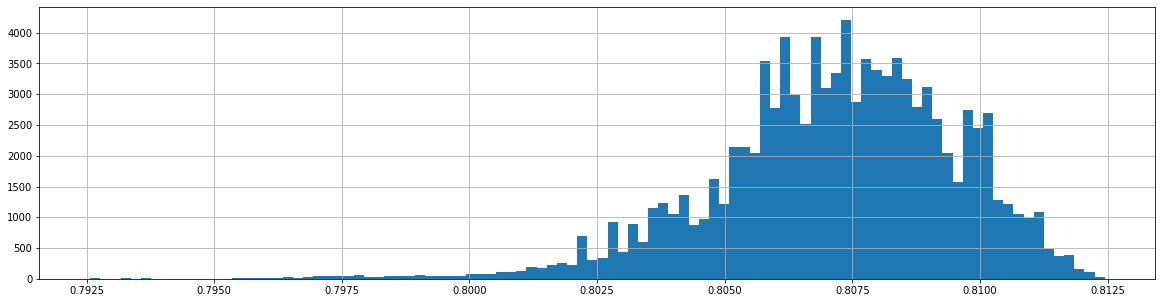

In [18]:
best.min_whole_validation_auc.hist(bins=100);

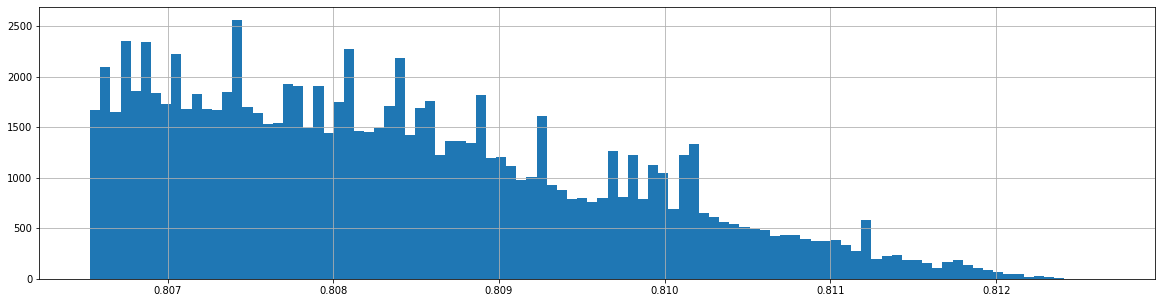

In [19]:
true_best.min_whole_validation_auc.hist(bins=100);

In [20]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

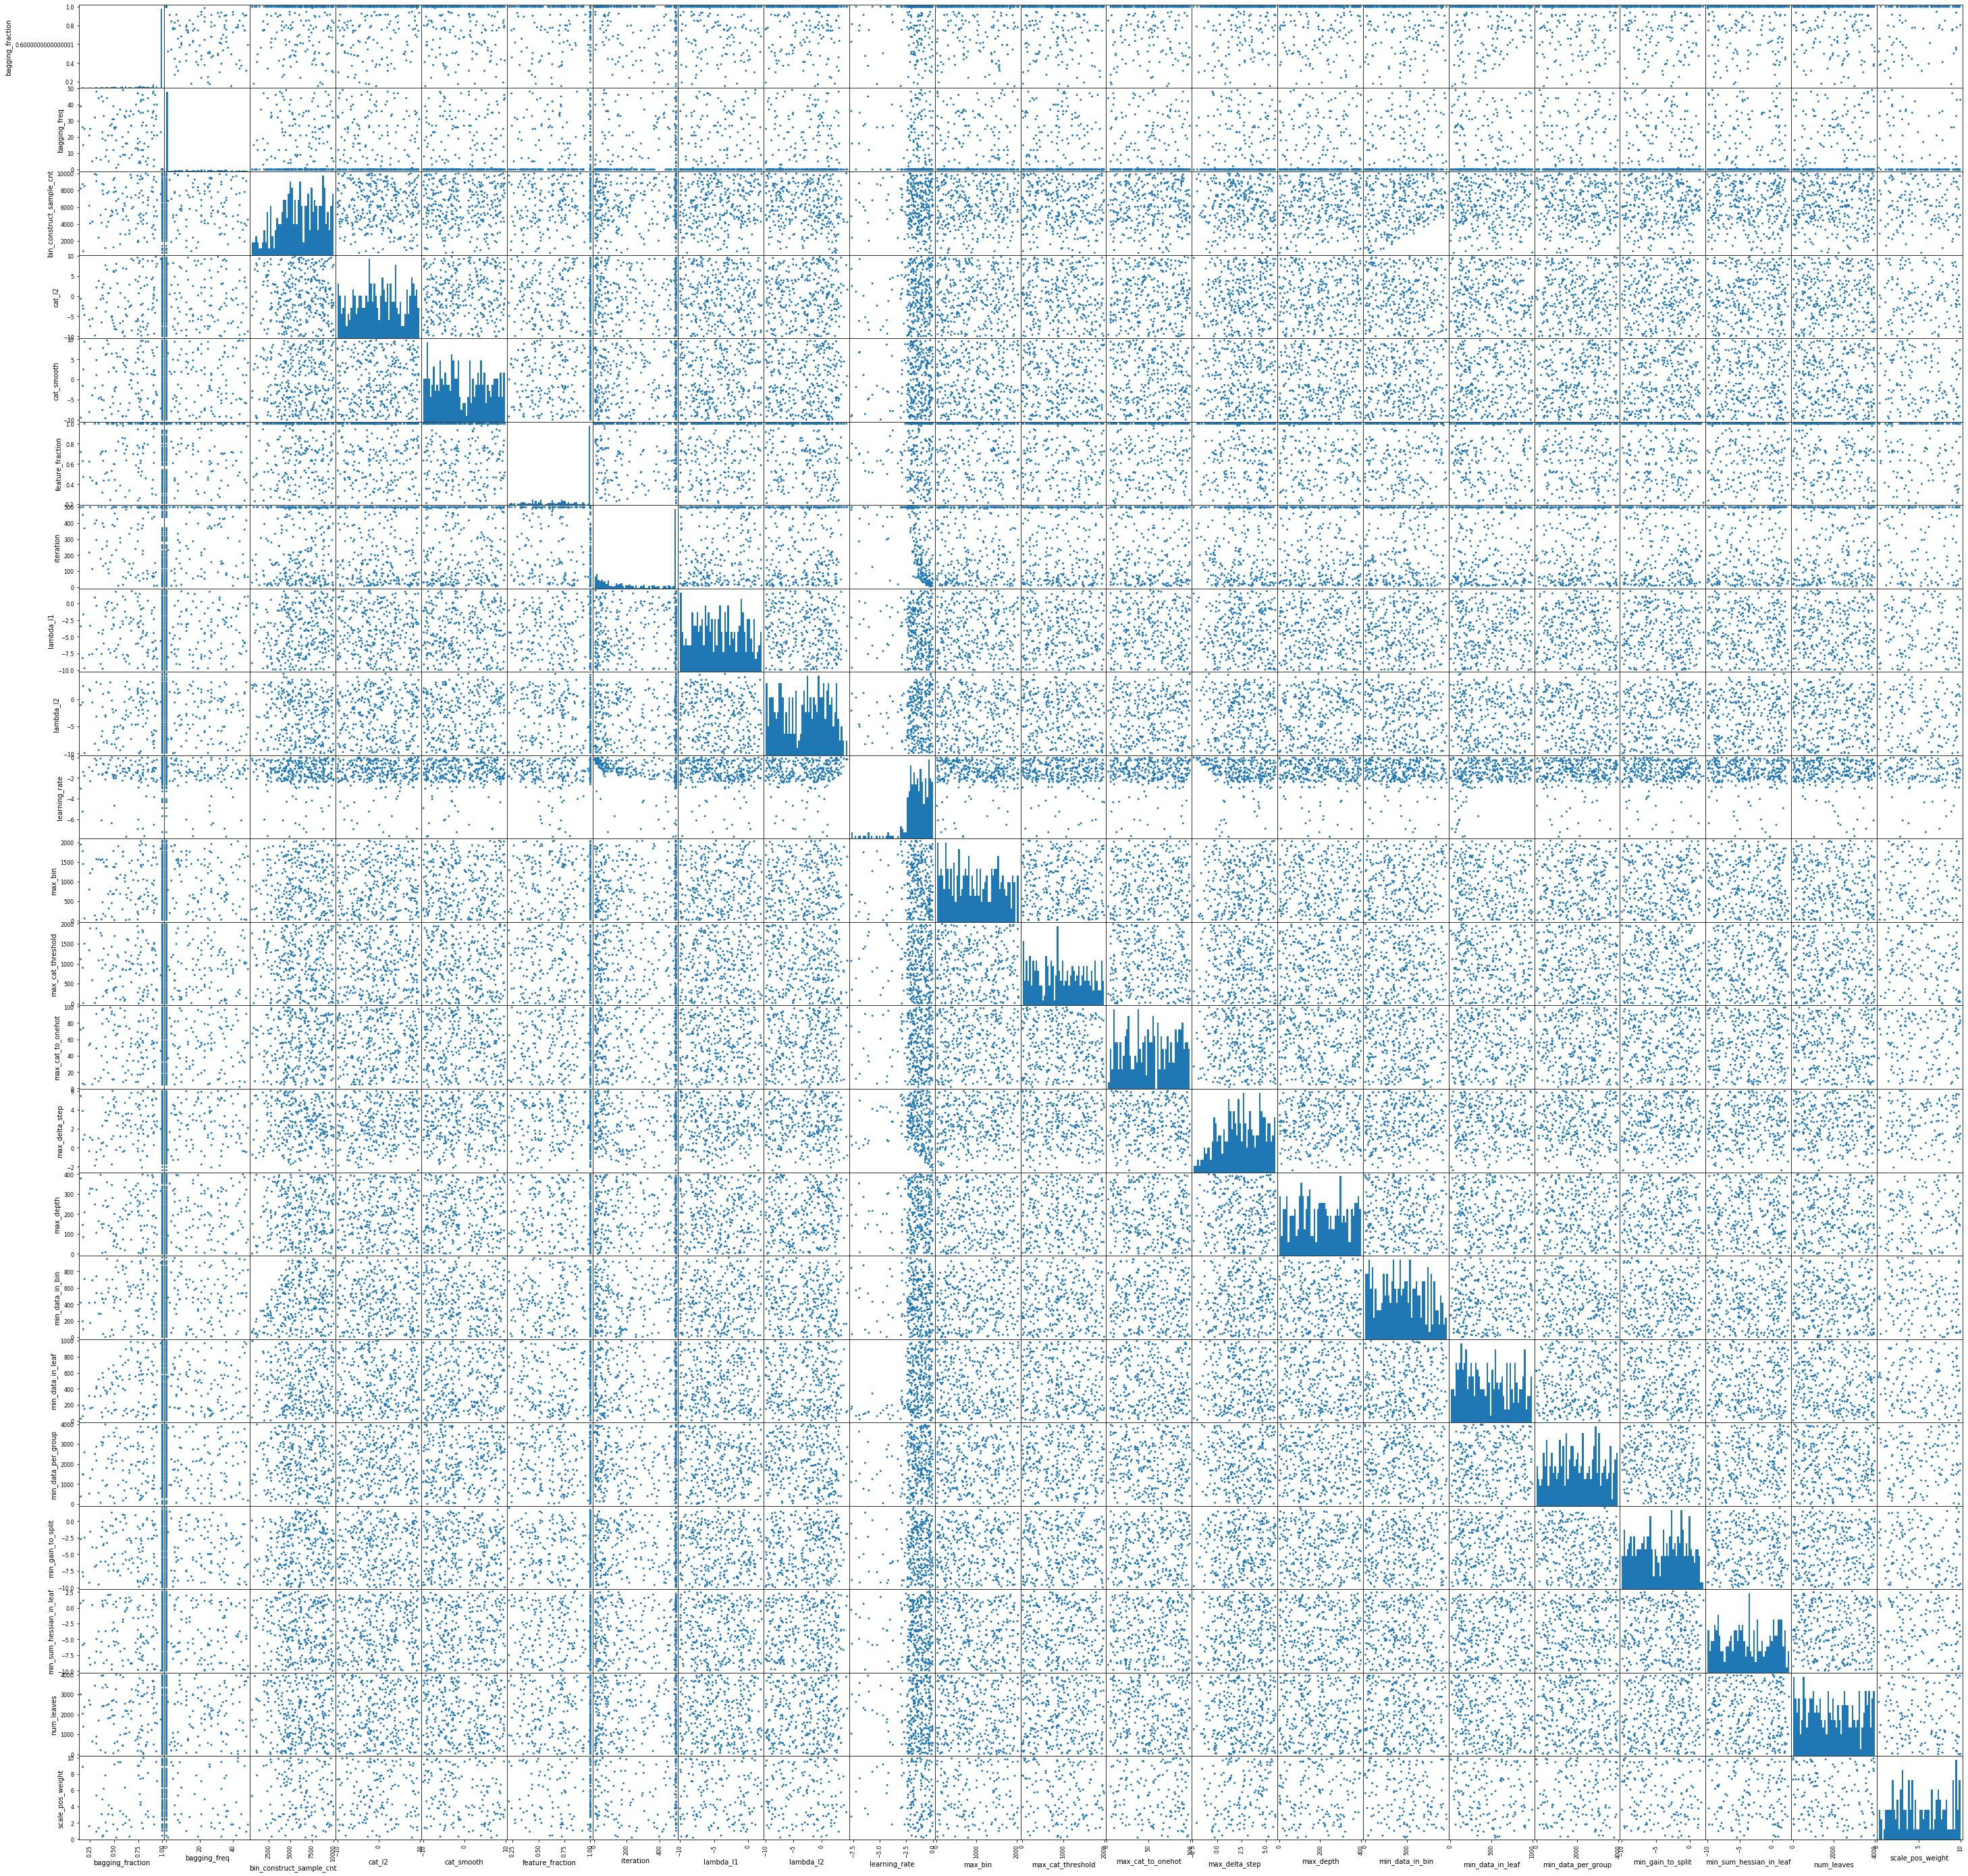

In [21]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [22]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable', 'param_feature_fraction_enable'])\
    .quantile([0, 1]).T
best_range

0.0           1.0
param_bagging_fraction          1.541503e-01  1.000000e+00
param_bagging_freq              0.000000e+00  4.900000e+01
param_bin_construct_sample_cnt  5.660000e+02  9.997000e+03
param_cat_l2                    1.060614e-10  5.597769e+09
param_cat_smooth                1.033252e-10  5.324188e+09
param_feature_fraction          2.123181e-01  1.000000e+00
param_lambda_l1                 1.082472e-10  9.145999e+01
param_lambda_l2                 1.195732e-10  4.285832e+04
param_learning_rate             2.113247e-08  9.939834e-01
param_max_bin                   2.000000e+01  2.047000e+03
param_max_cat_threshold         3.000000e+00  1.994000e+03
param_max_cat_to_onehot         2.000000e+00  9.900000e+01
param_max_delta_step            4.233906e-03  9.711010e+05
param_max_depth                 1.000000e+00  3.990000e+02
param_min_data_in_bin           3.000000e+00  9.670000e+02
param_min_data_in_leaf          4.000000e+00  9.960000e+02
param_min_data_per_group        1.000000e+00  3.981000e+03
param_min_gain_to_split         1.092387e-10  9.477941e+01
param_min_sum_hessian_in_leaf   1.100433e-10  3.998256e+02
param_num_leaves                5.000000e+00  3.996000e+03
param_scale_pos_weight          1.945609e-01  9.957570e+00

In [23]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(831000, 61)

In [24]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(1662, 59)

In [25]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [26]:
limited_bad.shape

(127, 59)

TODO pikachu with bruises reaction

### top parameters

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best_iteration.sort_values('mean_dev_auc', ascending=False).head(2).T)

file                                 ./experiments/good-20shuffle-3seed.pkl  \
experiment_id                                                          4088   
cnt                                                                       3   
iteration                                                                37   
max_dev_auc                                                        0.857391   
max_dev_binary_logloss                                             0.730693   
max_overfit_auc                                                   0.0329594   
max_overfit_binary_logloss                                        0.0362051   
max_validation_auc                                                 0.811116   
max_validation_binary_logloss                                      0.736212   
max_whole_train_auc                                                0.841573   
max_whole_train_binary_logloss                                     0.679234   
max_whole_validation_auc                            